


<div style="text-align:center;"><img src="logo.jpg" width="280"></div>



<div class="alert alert-block alert-success">
    <h1 align="center"> (Neural network)شبکه عصبی </h1>
    <h3 align="center"> ICTP, Physics Without Frontiers, 2025 </h3>
    <h4 align="center"><a href="https://www.researchgate.net/profile/Leila-Kalhor-2">(Layla Kalhor)لیلا کلهر</a></h5>
</div>

<img src = "https://www.neuraldesigner.com/wp-content/uploads/2023/06/perceptron-neuron-blog.webp">

<img src = "https://ars.els-cdn.com/content/image/3-s2.0-B9780128233375000020-f02-01-9780128233375.jpg">

<img src = "https://ai-master.gitbooks.io/perceptron/content/assets/image21.png">

<img src = "https://www.gabormelli.com/RKB/images/1/1e/Perceptron_44381865.png">



<div class="alert alert-block alert-success">
    <h1 align="center"> AND </h1>
    <h2 align="center"> OR </h2>
    <h3 align="center"> XOR </h3>
</div>

<img src = "https://developer.ibm.com/developer/default/articles/cc-cognitive-neural-networks-deep-dive/images/figure5.png">

<img src = "https://ai-master.gitbooks.io/perceptron/content/assets/image23.png">

<img src = "https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/symbolic-representation-of-perceptron-learning-rule_5.jpg">

<div class="alert alert-block alert-success">

<h1 align="center"> توضیح مفهومی </h1>

<h2 align="center"> ابتدا داده‌ها را رسم می‌کنیم: دو کلاس رنگ متفاوت دارد </h2>

<h2 align="center"> وزن‌ها و بایاس را با مقدار صفر یا تصادفی شروع می‌کنیم</h2>
     
  <h2 align="center">   
هر داده را نگاه می‌کنیم، پیش‌بینی می‌کنیم (با تابع پله‌ای)
</h2>     
      
<h2 align="center">      
      اگر پیش‌بینی اشتباه باشد، وزن‌ها و بایاس را کمی به سمت درست شدن تغییر می‌دهیم (قواعد ساده)
</h2>
    
    
<h2 align="center">    
پس از چند دوره (epoch) ،وزن‌ها طوری می‌شوند که خط تصمیم، داده‌ها را تا حد امکان جدا کند
</h2> 
    
<h2 align="center">       
خط تصمیم معادله‌ای است از وزن‌ها و بایاس
</h2>
    
<h2 align="center">     
هر نقطه‌ای که
</h2> 

<h2 align="center">  
w1x1+w2x2+b=0
</h2>

<h2 align="center"> 
    باشد روی خط قرار می‌گیرد
</h2> 
    
    
</div>    
    

# --------------------------------------------
# Perceptron (step-by-step) + plotting
# --------------------------------------------
# Requirements: numpy, matplotlib

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# -------------------------------------------------
# 1) INPUT DATA (x1, x2) and labels (y in {0,1})
#    Here we make a toy dataset similar to the picture:
#    Class 1 (green) in upper-left, Class 0 (red) in bottom-right
# -------------------------------------------------
class1 = np.array([[x, y] for x in range(-5, 1) for y in range(0, 6)])   # label 1
class0 = np.array([[x, y] for x in range(0, 6) for y in range(-5, 1)])   # label 0

X = np.vstack([class1, class0])                    # inputs (N, 2)
y = np.hstack([np.ones(len(class1)),               # labels (N,)
               np.zeros(len(class0))]).astype(int)

In [46]:
# -------------------------------------------------
# 2) WEIGHTS AND BIAS
#    You can set them manually OR train a few epochs.
#    Option A (manual): uncomment the next line and skip training.
# -------------------------------------------------
# w, b = np.array([-0.5, 0.5]), -0.1   # a reasonable separator for this toy data

# Option B (quick training): start from zeros and update with perceptron rule
w, b = np.zeros(2), 0.0
lr, epochs = 0.1, 15

In [47]:
# -------------------------------------------------
# 3) LINEAR SUM z = w.x + b
#    4) ACTIVATION FUNCTION (step)
# -------------------------------------------------
def linear_sum(x):            # z = w1*x1 + w2*x2 + b
    return np.dot(x, w) + b

def activation(z):           # step function
    return 1 if z >= 0 else 0

# Quick training loop (comment out if using manual w,b)
for _ in range(epochs):
    for xi, yi in zip(X, y):
        z = linear_sum(xi)
        y_hat = activation(z)
        err = yi - y_hat
        # Perceptron update
        w += lr * err * xi
        b += lr * err

In [48]:
# -------------------------------------------------
# 5) OUTPUTS for the training set (forward pass)
# -------------------------------------------------
z_all = np.dot(X, w) + b
y_pred = (z_all >= 0).astype(int)   # apply activation to all

print("Final weights:", w)
print("Final bias:", b)
acc = (y_pred == y).mean()
print(f"Train accuracy: {acc:.3f}")

Final weights: [-0.5  0.5]
Final bias: -0.1
Train accuracy: 0.986


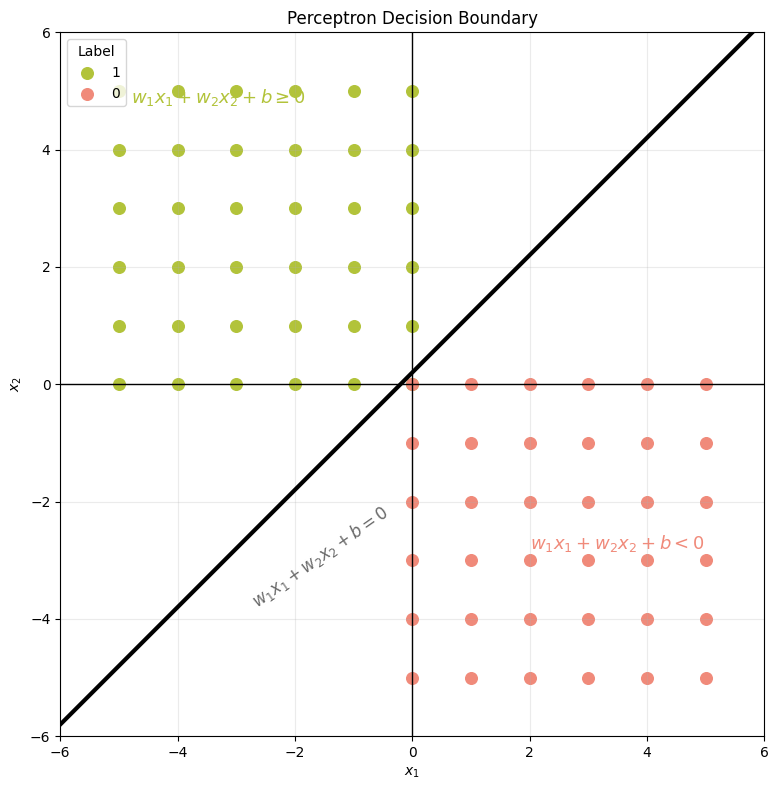

In [49]:
# -------------------------------------------------
# 6) PLOT DATA + DECISION BOUNDARY
# -------------------------------------------------
plt.figure(figsize=(8, 8))

# split points by label to color them
X1 = X[y == 1]
X0 = X[y == 0]
plt.scatter(X1[:, 0], X1[:, 1], s=70, color='#b2c33a', label='1')
plt.scatter(X0[:, 0], X0[:, 1], s=70, color='#f08a7a', label='0')

# axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# decision boundary: w1*x1 + w2*x2 + b = 0  ->  x2 = -(w1*x1 + b)/w2
x_vals = np.linspace(-6, 6, 200)
if abs(w[1]) > 1e-9:
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, color='black', linewidth=3)

# labels and annotations
plt.text(-4.8, 4.8, r'$w_1x_1 + w_2x_2 + b \geq 0$', color='#b2c33a', fontsize=13)
plt.text( 2.0, -2.8, r'$w_1x_1 + w_2x_2 + b < 0$', color='#f08a7a', fontsize=13)
plt.text(-2.8, -3.8, r'$w_1x_1 + w_2x_2 + b = 0$', rotation=35, fontsize=12, color='dimgray')

plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$')
plt.title('Perceptron Decision Boundary')
plt.legend(title='Label')
plt.grid(True, alpha=0.25)
plt.xlim(-6, 6); plt.ylim(-6, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [50]:

# -------------------------------------------------
# 7) TEST ON A HYPOTHETICAL DATA POINT
# -------------------------------------------------
test_point = np.array([3, 3])  # example input
z = linear_sum(test_point)     # sum
out = activation(z)            # apply activation
print("Test point:", test_point, " -> z =", z, " -> output =", out)

Test point: [3 3]  -> z = -0.1  -> output = 0


<img src = "https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/Perceptron_36.jpg">

<img src = "https://cdn.botpenguin.com/assets/website/Deep_Neural_Network_2b9d9075e9.webp">

<div class="alert alert-block alert-success">
<h1 align="center"> 
در حالت غیرخطی،
پرسپترون خطی نمی‌تواند دسته‌ها را جدا کند. برای همین از یک لایه‌ی مخفی با تابع فعال‌ساز غیرخطی
استفاده می‌کنیم
</h1>
    
<h1 align="center"> 
( سیگموید ) 
</h1>

<h1 align="center">     
یعنی یک شبکه عصبی چندلایه 
(MLP)
</h1>

<h1 align="center">     
کدی که در ادامه می‌نویسم
</h1>
    
<h1 align="center">     
داده‌ای غیرخطی
</h1>

<h1 align="center">      
( XOR) 
</h1>

<h1 align="center">     
می‌سازیم
</h1>
    
<h1 align="center">     
وزن‌ها و بایاس‌ها را مقداردهی می‌کنیم
</h1>

<h1 align="center"> 
جمع خطی + تابع فعال‌ساز غیرخطی (سیگموید)
</h1>

<h1 align="center"> 
آموزش با 
</h1>
    
<h1 align="center"> 
Gradient Descent
</h1>
    
<h1 align="center"> 
رسم مرز تصمیم
</h1>

<h1 align="center"> 
تست روی داده‌ی جدید
</h1>

</div>

<img src = "https://raw.githubusercontent.com/jtsulliv/ML-from-scratch/1bbeaf647b766ef98dc8d8ad8be5d2e0f5d750da/Neural-Networks/linsep_new.png">

In [51]:
# --------------------------------------------
# Non-linear Perceptron (MLP with 1 hidden layer)
# --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# 1) INPUT DATA (XOR problem = non-linear)
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0, 1, 1, 0])  # XOR labels

In [52]:


# 2) Initialize weights and biases
np.random.seed(42)
hidden_size = 2   # number of hidden neurons
w1 = np.random.randn(2, hidden_size)   # weights input -> hidden
b1 = np.zeros((1, hidden_size))        # bias hidden
w2 = np.random.randn(hidden_size, 1)   # weights hidden -> output
b2 = np.zeros((1, 1))                  # bias output

lr = 0.1   # learning rate
epochs = 5000

In [53]:


# 3) Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [54]:

# 4) Training loop (forward + backpropagation)
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)            # hidden layer output
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)            # final output
    
    # Compute loss (mean squared error)
    loss = np.mean((y.reshape(-1,1) - a2)**2)
    
    # Backward pass
    d_a2 = -(y.reshape(-1,1) - a2)         # derivative of loss wrt a2
    d_z2 = d_a2 * sigmoid_deriv(z2)
    dw2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)
    
    d_a1 = np.dot(d_z2, w2.T)
    d_z1 = d_a1 * sigmoid_deriv(z1)
    dw1 = np.dot(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)
    
    # Update weights
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

<img src = "./123.png">

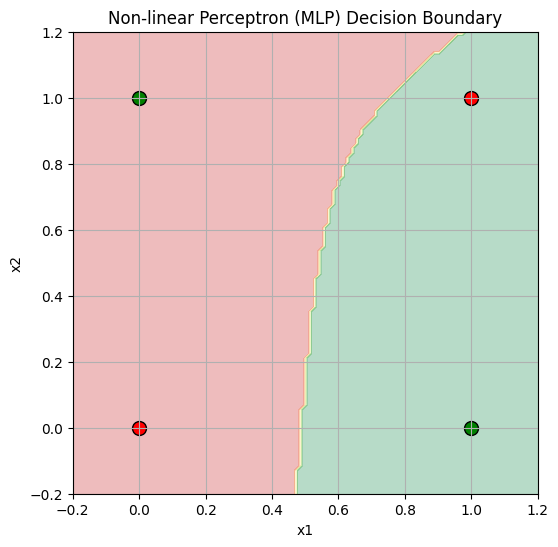

In [55]:


# 5) Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.2,1.2,100), np.linspace(-0.2,1.2,100))
grid = np.c_[xx.ravel(), yy.ravel()]

# forward pass on grid
z1 = np.dot(grid, w1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2
a2 = sigmoid(z2)
preds = (a2 >= 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, preds, alpha=0.3, cmap='RdYlGn')

# plot original points
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i,0], X[i,1], color='red', s=100, edgecolor='k')
    else:
        plt.scatter(X[i,0], X[i,1], color='green', s=100, edgecolor='k')

plt.title("Non-linear Perceptron (MLP) Decision Boundary")
plt.xlabel("x1"); plt.ylabel("x2")
plt.grid(True)
plt.show()



In [56]:

# 6) Test on a new data point
test_point = np.array([[0.8, 0.2]])
z1 = np.dot(test_point, w1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2
out = sigmoid(z2)
print("Test point:", test_point, "-> Output:", int(out >= 0.5))

Test point: [[0.8 0.2]] -> Output: 1


/tmp/ipykernel_5237/4054471169.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Test point:", test_point, "-> Output:", int(out >= 0.5))


<div class="alert alert-block alert-success">
<h1 align="center">
پرسپترون خطی به یک
</h1>
    
<h1 align="center">   
    MLP
</h1>
<h1 align="center">  
    با لایه‌ی مخفی ارتقا داده شده
</h1>

<h1 align="center">    
داده‌ها 
</h1>
<h1 align="center">      
    XOR 
</h1>
<h1 align="center">      
    هستند که به‌صورت خطی قابل‌جداسازی نیستند
</h1>    

<h1 align="center">    
پس از آموزش، مرز تصمیم غیرخطی رسم می‌شود
</h1>    

</div>    

In [57]:
# --------------------------------------------
# ANN Example with 2 hidden layers
# --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 1) Generate nonlinear data (circle dataset)
X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Convert labels to column vector
y = y.reshape(-1,1)

# 2) Initialize network architecture
np.random.seed(42)
input_size = 2
h1_size = 4   # first hidden layer
h2_size = 3   # second hidden layer
output_size = 1

# Weights and biases
W1 = np.random.randn(input_size, h1_size)
b1 = np.zeros((1, h1_size))
W2 = np.random.randn(h1_size, h2_size)
b2 = np.zeros((1, h2_size))
W3 = np.random.randn(h2_size, output_size)
b3 = np.zeros((1, output_size))

# 3) Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)   # derivative wrt activated value


<img src = "./12.png">

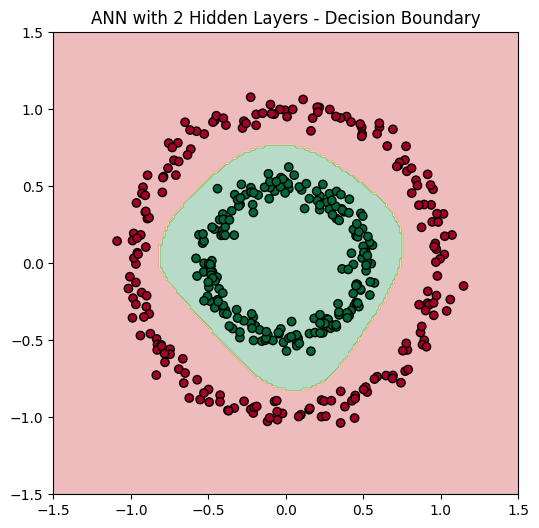

In [58]:

# 4) Training (forward + backpropagation)
lr = 0.1
epochs = 5000

for epoch in range(epochs):
    # Forward
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    
    z3 = a2.dot(W3) + b3
    a3 = sigmoid(z3)  # final output
    
    # Loss (binary cross-entropy style)
    loss = np.mean((y - a3)**2)
    
    # Backpropagation
    d_a3 = (a3 - y)
    d_z3 = d_a3 * sigmoid_deriv(a3)
    dW3 = a2.T.dot(d_z3)
    db3 = np.sum(d_z3, axis=0, keepdims=True)
    
    d_a2 = d_z3.dot(W3.T)
    d_z2 = d_a2 * sigmoid_deriv(a2)
    dW2 = a1.T.dot(d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)
    
    d_a1 = d_z2.dot(W2.T)
    d_z1 = d_a1 * sigmoid_deriv(a1)
    dW1 = X.T.dot(d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)
    
    # Update
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

# 5) Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass for grid
a1 = sigmoid(grid.dot(W1) + b1)
a2 = sigmoid(a1.dot(W2) + b2)
a3 = sigmoid(a2.dot(W3) + b3)
preds = (a3 >= 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, preds, cmap='RdYlGn', alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='RdYlGn', edgecolor='k')
plt.title("ANN with 2 Hidden Layers - Decision Boundary")
plt.show()



In [59]:

# 6) Test on a new point
test_point = np.array([[0.8, 0.0]])
a1 = sigmoid(test_point.dot(W1) + b1)
a2 = sigmoid(a1.dot(W2) + b2)
a3 = sigmoid(a2.dot(W3) + b3)
print("Test point:", test_point, "-> Output:", int(a3 >= 0.5))

Test point: [[0.8 0. ]] -> Output: 0


/tmp/ipykernel_5237/883443465.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Test point:", test_point, "-> Output:", int(a3 >= 0.5))


<img src = "https://www.deep-mind.org/wp-content/uploads/2023/03/CoverPage_The-Universal-Approximation-Theorem.png">

# Universal approximation theorem

Epoch  800 | MSE: 0.014628
Epoch 1600 | MSE: 0.011254
Epoch 2400 | MSE: 0.009383
Epoch 3200 | MSE: 0.008081
Epoch 4000 | MSE: 0.007129


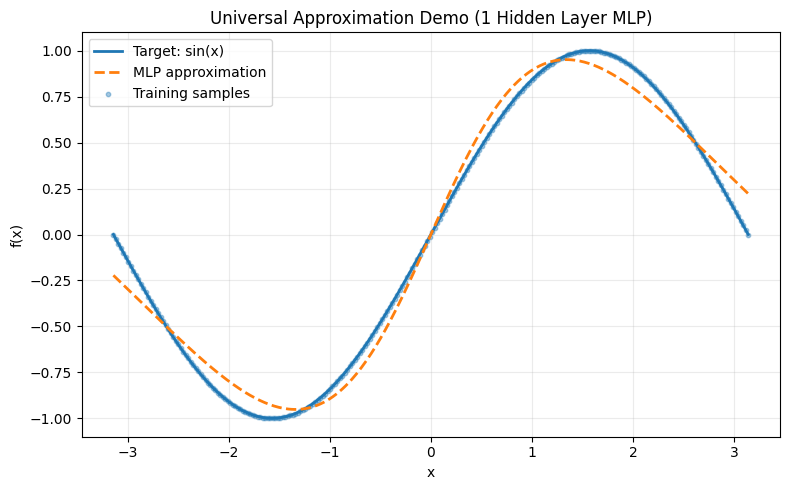

x=-2.50 | sin(x)=-0.5985 | MLP(x)=-0.5618
x=-1.00 | sin(x)=-0.8415 | MLP(x)=-0.8935
x= 0.00 | sin(x)=+0.0000 | MLP(x)=-0.0000
x= 1.00 | sin(x)=+0.8415 | MLP(x)=+0.8935
x= 2.50 | sin(x)=+0.5985 | MLP(x)=+0.5618


In [60]:
# --------------------------------------------
# Universal Approximation Theorem - Simple Demo
# Single-hidden-layer MLP approximating f(x) = sin(x) on [-pi, pi]
# --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# 1) INPUT DATA: sample points and target function
np.random.seed(42)
N = 256                                # number of training samples
X = np.linspace(-np.pi, np.pi, N).reshape(-1, 1)   # inputs (N, 1)
y = np.sin(X)                           # target outputs (N, 1)

# 2) WEIGHTS AND BIASES (one hidden layer)
input_size  = 1
hidden_size = 20        # try 5, 10, 20, 50 ... (more neurons -> better approximation)
output_size = 1
W1 = np.random.randn(input_size, hidden_size) * 0.5
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.5
b2 = np.zeros((1, output_size))

# 3) LINEAR SUM + 4) ACTIVATION FUNCTION (nonlinear)
# We'll use tanh for the hidden layer; linear activation for output (regression)
def tanh(z):
    return np.tanh(z)

def tanh_deriv_from_a(a):
    # derivative of tanh given activated value a = tanh(z)
    return 1.0 - a**2

def forward(X):
    """Forward pass returns all intermediates for backprop"""
    z1 = X @ W1 + b1        # (N, H)
    a1 = tanh(z1)           # (N, H)
    z2 = a1 @ W2 + b2       # (N, 1)  (linear output for regression)
    yhat = z2
    return z1, a1, z2, yhat

# 5) TRAINING (MSE + simple gradient descent)
lr = 0.01
epochs = 4000

for epoch in range(epochs):
    # Forward
    z1, a1, z2, yhat = forward(X)

    # Mean Squared Error
    diff = (yhat - y)                    # (N, 1)
    loss = np.mean(diff**2)

    # Backpropagation
    d_yhat = (2.0 / N) * diff           # dL/dyhat  (N, 1)

    # Gradients for output layer
    dW2 = a1.T @ d_yhat                 # (H, 1)
    db2 = np.sum(d_yhat, axis=0, keepdims=True)   # (1, 1)

    # Backprop into hidden
    d_a1 = d_yhat @ W2.T                # (N, H)
    d_z1 = d_a1 * tanh_deriv_from_a(a1) # (N, H)
    dW1 = X.T @ d_z1                    # (1, H)
    db1 = np.sum(d_z1, axis=0, keepdims=True)     # (1, H)

    # Gradient descent updates
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # (optional) print loss occasionally
    if (epoch+1) % 800 == 0:
        print(f"Epoch {epoch+1:4d} | MSE: {loss:.6f}")

# 6) OUTPUT: predictions on dense grid for plotting
xx = np.linspace(-np.pi, np.pi, 400).reshape(-1, 1)
_, a1_grid, _, yhat_grid = forward(xx)

# 7) PLOT: true function vs network approximation
plt.figure(figsize=(8,5))
plt.plot(xx, np.sin(xx), label="Target: sin(x)", linewidth=2)
plt.plot(xx, yhat_grid, label="MLP approximation", linewidth=2, linestyle="--")
plt.scatter(X, y, s=10, alpha=0.4, label="Training samples")
plt.title("Universal Approximation Demo (1 Hidden Layer MLP)")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

# 8) TEST: evaluate a few hypothetical points
x_test = np.array([[-2.5], [-1.0], [0.0], [1.0], [2.5]])
_, _, _, y_pred = forward(x_test)
for xi, yi, yi_hat in zip(x_test.ravel(), np.sin(x_test).ravel(), y_pred.ravel()):
    print(f"x={xi:5.2f} | sin(x)={yi:+.4f} | MLP(x)={yi_hat:+.4f}")


<div class="alert alert-block alert-success">
<h1 align="center">
تفاوت در یک نگاه
 </h1>
<h1 align="center">    
MLP (Multi-Layer Perceptron)
</h1>
<h1 align="center">
    یک معماری شبکهٔ عصبی است؛ لایه‌های کاملاً متصل (ورودی، چند لایهٔ مخفی، خروجی) با یک تابع فعال‌ساز غیرخطی
</h1>   
<h1 align="center">    
    (sigmoid/tanh/ReLU و …)
</h1>
<h1 align="center">    
    چیزی‌ست که واقعاً می‌سازیم و آموزش می‌دهیم
</h1>

<h1 align="center">     
Universal Approximation Theorem (UAT)
</h1>
<h1 align="center"> 
یک قضیهٔ نظری دربارهٔ ظرفیت تقریب شبکه‌های عصبی است؛ می‌گوید یک
</h1>
<h1 align="center"> 
MLP 
</h1>
<h1 align="center"> 
با فقط یک لایهٔ مخفی و فعال‌ساز غیرخطی مناسب می‌تواند هر تابع پیوسته را روی یک بازهٔ محدود با دقت دلخواه تقریب کند (اگر تعداد نرون‌های لایهٔ مخفی کافی باشد).
</h1>

